In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Linux-4.4.0-159-generic-x86_64-with-debian-stretch-sid
Tensorflow version: 1.14.0
Keras version: 2.2.5


Using TensorFlow backend.


# Data preparation

In [2]:
import os

ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "data")

In [3]:
import os, shutil

original_dataset_dir = os.path.join(DATA_PATH, 'train')

base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

# training dataset folder
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

# validation dataset folder
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

# test dataset folder
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
# Create folder for dogs and cats separately
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [4]:
# 複製前1000個貓的圖片到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 cat images to train_cats_dir complete!')


fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')


fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')



fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')


fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!')

Copy first 1000 cat images to train_cats_dir complete!
Copy next 500 cat images to validation_cats_dir complete!
Copy next 500 cat images to test_cats_dir complete!
Copy first 1000 dog images to train_dogs_dir complete!
Copy next 500 dog images to validation_dogs_dir complete!
Copy next 500 dog images to test_dogs_dir complete!


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# Data preprocessing

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Read from the folder
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validatiion_generator = test_datagen.flow_from_directory(
        validation_dir,
        # Images will be converted to size 150 * 150
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape: (20,)


# Model

In [23]:
from keras import layers
from keras import models
from keras.utils import plot_model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Traing

In [21]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100,  #
    epochs=30, 
    validation_data=validatiion_generator, 
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 65s 651ms/step - loss: 0.6933 - acc: 0.5072 - val_loss: 0.6815 - val_acc: 0.5996
Epoch 2/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6802 - acc: 0.5575 - val_loss: 0.6545 - val_acc: 0.5947
Epoch 3/30
100/100 [==============================] - 63s 633ms/step - loss: 0.6709 - acc: 0.5841 - val_loss: 0.6386 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 63s 630ms/step - loss: 0.6486 - acc: 0.6209 - val_loss: 0.6071 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6244 - acc: 0.6422 - val_loss: 0.6911 - val_acc: 0.5920
Epoch 6/30
100/100 [==============================] - 65s 651ms/step - loss: 0.6085 - acc: 0.6550 - val_loss: 0.5882 - val_acc: 0.6804
Epoch 7/30
100/100 [==============================] - 63s 632ms/step - loss: 0.6069 - acc: 0.6638 - val_loss: 0.5717 - val_acc: 0.6904
Epoch 8/30
100/100 [==============================] - 6

In [12]:
model.save('cats_and_dogs_small_2.h5')

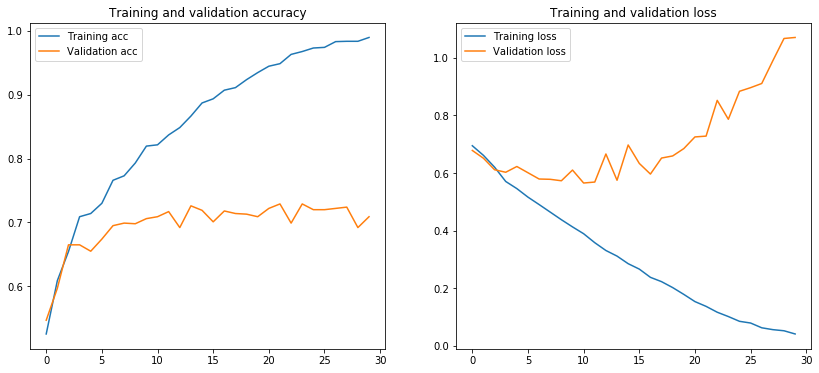

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Overfitting
epochs = range(len(acc))
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data argumentation

In [14]:
data_generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=.2,
        height_shift_range=.2,
        shear_range=.2,
        zoom_range=.2,
        horizontal_flip=True,
        fill_mode='nearest')

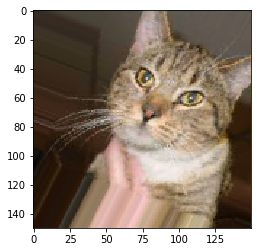

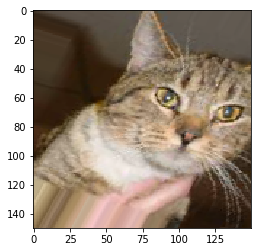

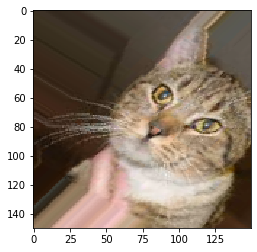

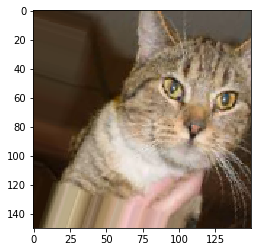

In [15]:
# Visualise the effect of argumentation for one image
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1, *(x.shape)))

# The flow method will generate new image randomly
# it is an infinite loop, so need break
for i, batch in enumerate(data_generator.flow(x, batch_size=1)):
    plt.figure(i)
    implot = plt.imshow(image.array_to_img(batch[0]))
    if (i+1) % 4 == 0:
        break
        
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(
        rescale=1/255, 
        rotation_range=40,
        shear_range=.2,
        width_shift_range=.2,
        height_shift_range=.2,
        zoom_range=.2,
        horizontal_flip=True,
        )

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=32,
        class_mode='binary')

validatiion_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='binary')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validatiion_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 62s 624ms/step - loss: 0.6899 - acc: 0.5341 - val_loss: 0.6855 - val_acc: 0.5431
Epoch 2/30
100/100 [==============================] - 60s 604ms/step - loss: 0.6811 - acc: 0.5584 - val_loss: 0.6619 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 61s 606ms/step - loss: 0.6679 - acc: 0.5966 - val_loss: 0.6408 - val_acc: 0.6225
Epoch 4/30
100/100 [==============================] - 60s 598ms/step - loss: 0.6505 - acc: 0.6113 - val_loss: 0.6383 - val_acc: 0.6224
Epoch 5/30
100/100 [==============================] - 60s 597ms/step - loss: 0.6370 - acc: 0.6337 - val_loss: 0.6007 - val_acc: 0.6834
Epoch 6/30
100/100 [==============================] - 61s 609ms/step - loss: 0.6274 - acc: 0.6513 - val_loss: 0.5882 - val_acc: 0.6907
Epoch 7/30
100/100 [==============================] - 62s 616ms/step - loss: 0.6063 - acc: 0.6778 - val_lo

In [18]:
model.save('cats_and_dogs_small_2.h5')

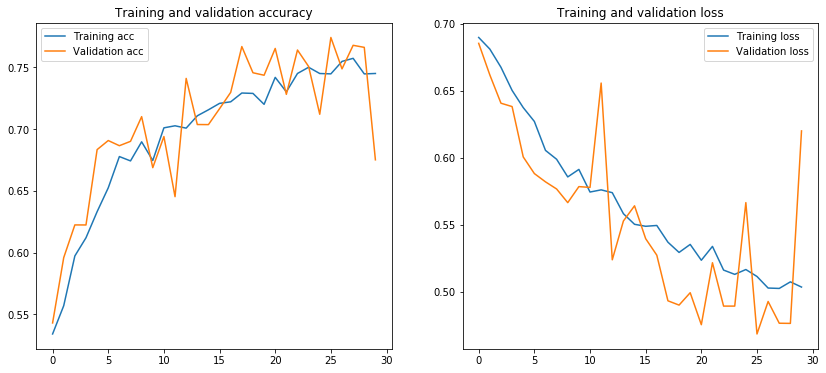

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Overfitting
epochs = range(len(acc))
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()